<a href="https://colab.research.google.com/github/rishi-jaizz/Deep-Learning/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt


Load and Preprocess MNIST Dataset

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, transform=transform, download=True
)
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transform, download=True
)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Define the Neural Network

In [ ]:
class DigitRecognizer(nn.Module):
    def __init__(self):
        super(DigitRecognizer, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),  # Flatten the 28x28 image into a vector
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)  # 10 output classes for digits 0-9
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DigitRecognizer().to(device)


Define Loss and Optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)


Train the Model

In [ ]:
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Train the model
train_model(model, train_loader, criterion, optimizer, epochs=5)


Epoch [1/5], Loss: 0.0643
Epoch [2/5], Loss: 0.0535
Epoch [3/5], Loss: 0.0504
Epoch [4/5], Loss: 0.0429
Epoch [5/5], Loss: 0.0392


In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Predicted class is the one with max logit
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Evaluate the model
evaluate_model(model, test_loader)


Test Accuracy: 97.14%


Evaluate the Model

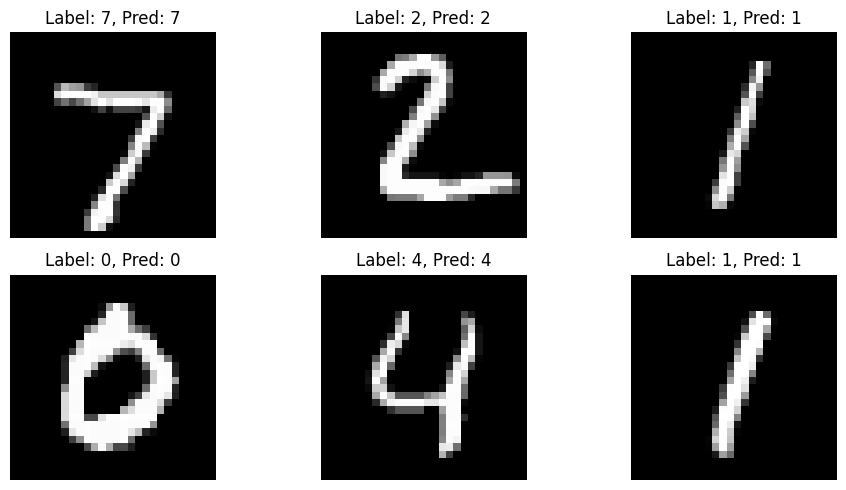

In [ ]:
def visualize_predictions(model, test_loader):
    model.eval()
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Plot first 6 images with their predictions
    plt.figure(figsize=(10, 5))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title(f"Label: {labels[i].item()}, Pred: {predicted[i].item()}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize some predictions
visualize_predictions(model, test_loader)
